In [1]:
#Upload test images
from google.colab import files
testimage = files.upload()

Saving images.jpeg to images.jpeg


In [ ]:
!pip install mediapipe==0.10.3
!pip install opencv-python==4.5.1.48


  Using cached opencv-python-4.5.1.48.tar.gz (88.3 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 79, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 100, in main
    with self.main_context():
  File "/usr/lib/python3.10/contextlib.py", line 142, in __exit__
    next(self.gen)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/command_context.py", line 19, in main_context
    with self._main_context:
  File "/usr/lib/python3.10/contextlib.py", line 576, in __exit__
    raise exc_details[1]
  File "/usr/lib/python3.10/contextlib.py", line 153, in __exit__
    self.gen.throw(typ, value, traceback)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/temp_di

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [ ]:
def angle_btn_3points(p1,p2,p3):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    radians = np.arctan2(p3[1]-p2[1], p3[0]-p2[0]) - np.arctan2(p1[1]-p2[1], p1[0]-p2[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle >180.0:
        angle = 360-angle
    return angle

In [ ]:
def detect_squat(cL, cR, dL, dR):
    # if cL>150 and cR>150 and dL>150 and dR>150:
    #     res = "Output: Stand"
    if cL<130 and cR<130 and dL<130 and dR<130:
        res = "True"
    else:
        res = "False"
    return res

In [ ]:
def hand_gesture(aL, aR, bL, bR):
    if aL>130 and aR>130 and bL<120 and bR<120 and bL>30 and bR>30:
        res = "Hand Gesture: True"
    else:
        res = "Hand Gesture: False"
    return res

In [ ]:
def mean_square_error(cL, cR, dL, dR):
    res = np.square([cL-85, cR-109, dL-89, dR-113]).mean()
    return "MSE: "+str(round(res,2))

Text(0.5, 1.0, 'Sample Image')

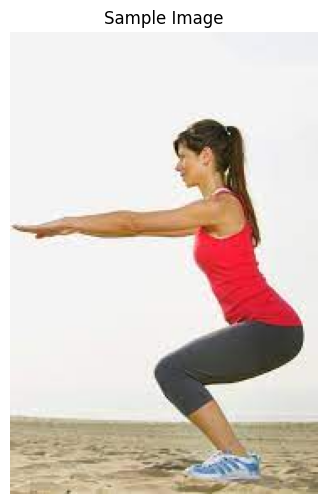

In [ ]:
for name in testimage.keys():
  img = cv2.imread(name)

plt.figure(figsize=((8,6)))
plt.imshow(np.flip(img,(2)))
plt.axis('off')
plt.title('Sample Image')

In [ ]:
def test_image(image):
    # img = cv2.imread(image)
    # # img = cv2.imread(image)
    # img = cv2.resize(img,(480,640))
    # image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Keypoints detection
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Extracting the landmarks
    try:
        landmarks = results.pose_landmarks.landmark
        kp = mp_pose.PoseLandmark

        # Get coordinates and angle (Left Elbow angle)
        p1 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p2 = [landmarks[kp.LEFT_ELBOW.value].x,landmarks[kp.LEFT_ELBOW.value].y]
        p3 = [landmarks[kp.LEFT_WRIST.value].x,landmarks[kp.LEFT_WRIST.value].y]
        AL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Elbow angle)
        p1 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p2 = [landmarks[kp.RIGHT_ELBOW.value].x,landmarks[kp.RIGHT_ELBOW.value].y]
        p3 = [landmarks[kp.RIGHT_WRIST.value].x,landmarks[kp.RIGHT_WRIST.value].y]
        AR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle(Left Shoulder angle)
        p1 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p2 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p3 = [landmarks[kp.LEFT_ELBOW.value].x,landmarks[kp.LEFT_ELBOW.value].y]
        BL = angle_btn_3points(p1, p2, p3)

        # Get coordinates (Right Shoulder angle)
        p1 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p2 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p3 = [landmarks[kp.RIGHT_ELBOW.value].x,landmarks[kp.RIGHT_ELBOW.value].y]
        BR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Left Hip angle)
        p1 = [landmarks[kp.LEFT_SHOULDER.value].x,landmarks[kp.LEFT_SHOULDER.value].y]
        p2 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p3 = [landmarks[kp.LEFT_KNEE.value].x,landmarks[kp.LEFT_KNEE.value].y]
        CL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Hip angle)
        p1 = [landmarks[kp.RIGHT_SHOULDER.value].x,landmarks[kp.RIGHT_SHOULDER.value].y]
        p2 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p3 = [landmarks[kp.RIGHT_KNEE.value].x,landmarks[kp.RIGHT_KNEE.value].y]
        CR = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Left Knee angle)
        p1 = [landmarks[kp.LEFT_HIP.value].x,landmarks[kp.LEFT_HIP.value].y]
        p2 = [landmarks[kp.LEFT_KNEE.value].x,landmarks[kp.LEFT_KNEE.value].y]
        p3 = [landmarks[kp.LEFT_ANKLE.value].x,landmarks[kp.LEFT_ANKLE.value].y]
        DL = angle_btn_3points(p1, p2, p3)

        # Get coordinates and angle (Right Knee angle)
        p1 = [landmarks[kp.RIGHT_HIP.value].x,landmarks[kp.RIGHT_HIP.value].y]
        p2 = [landmarks[kp.RIGHT_KNEE.value].x,landmarks[kp.RIGHT_KNEE.value].y]
        p3 = [landmarks[kp.RIGHT_ANKLE.value].x,landmarks[kp.RIGHT_ANKLE.value].y]
        DR = angle_btn_3points(p1, p2, p3)

        # Squat Detection
        status = detect_squat(CL, CR, DL, DR)

        # Hand Gesture
        status2 = hand_gesture(AL, AR, BL, BR)

        # Mean Squared Error
        status3 = mean_square_error(CL, CR, DL, DR)

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(0,255,255), thickness=2, circle_radius=2),
                            mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2)
                             )
        # Output Status
        cv2.putText(image, status, (350,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
        cv2.putText(image, status2, (20,80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, status3, (20,120), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
    except:
        print("exception")
        pass

    return np.flip(image,(2))

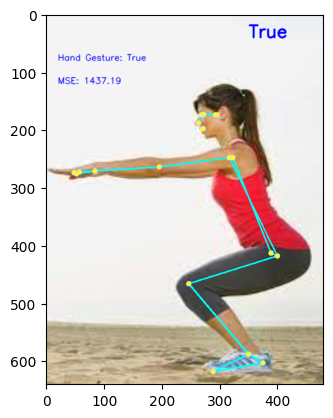

In [ ]:
for name in testimage.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  output = test_image(image)
  plt.imshow(output)

In [ ]:
#Uploading multiple images and checking the output
testimage1 = files.upload()
testimage2 = files.upload()
testimage3 = files.upload()
testimage4 = files.upload()

Saving gq-lunge.webp to gq-lunge.webp


Saving images.jpeg to images (1).jpeg


Saving images (3).jpeg to images (3).jpeg


Saving images (2).jpeg to images (2).jpeg


In [ ]:
# create figure
fig = plt.figure(figsize=(20, 20))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
for name in testimage1.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  Image1 = test_image(image)

for name in testimage2.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  Image2 = test_image(image)

for name in testimage3.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  Image3 = test_image(image)

for name in testimage4.keys():
  img = cv2.imread(name)
    # img = cv2.imread(image)
  img = cv2.resize(img,(480,640))
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  Image4 = test_image(image)

img = [Image1, Image2, Image3, Image4]

for i, j in enumerate(img):
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(j)
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.